# **Final Project**
**Business Applications of Machine Learning [100 Marks]**


Please fill out the following:

• Full Names of all Group members: Shijie Yu, xxx

**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [2]:
fulldf = pd.read_csv('').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('')
populationdf = pd.read_csv('').drop(columns='Unnamed: 0')

In [3]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,1317,566,540,1442,1857,*,3 or fewer,*,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,769,1707,564,4177,1333,*,3 or fewer,*,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,124,349,67,768,191,*,3 or fewer,*,*,*


In [4]:
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY
0,4858979,1,0
1,55347,1,1
2,203709,1,3
3,26489,1,5
4,22583,1,7


Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [5]:
# Print out the format of the FIPS column
print(f"The format of the FIPS column is {fulldf['FIPS'].dtype}")

# Convet into five digit format
fulldf['FIPS'] = fulldf['FIPS'].astype('str')
fulldf['FIPS'] = fulldf['FIPS'].str.pad(width = 5, side = 'left', fillchar = '0')

The format of the FIPS column is int64


### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [6]:
# Count the number of null in each column
missing_value_count = fulldf.isnull().sum()

# Get the total number of rows
total_row_count = fulldf.shape[0]

# Calculate the percentage of missing value in each column
missing_value_percentage = missing_value_count / total_row_count * 100

# List all the percentage of missing value in each column
missing_value_percentage

State                   0.000000
AreaName                0.000000
All_Poverty             0.000000
M_Poverty               0.000000
F_Poverty               0.000000
FIPS                    0.000000
Med_Income              0.031908
Med_Income_White        0.063816
Med_Income_Black       38.608807
Med_Income_Nat_Am      52.967454
Med_Income_Asian       56.062540
Med_Income_Hispanic    21.729419
M_With                  0.000000
M_Without               0.000000
F_With                  0.000000
F_Without               0.000000
All_With                0.000000
All_Without             0.000000
Incidence_Rate          0.000000
Avg_Ann_Incidence       0.000000
Recent_Trend            0.000000
Mortality_Rate          0.000000
Avg_Ann_Deaths          0.000000
dtype: float64

In [7]:
# Generate list of columns which has more than 20% null values
temp_df = pd.DataFrame(missing_value_percentage, columns=['percentage'])
columns_to_drop = temp_df[temp_df['percentage'] > 20].index.to_list()
print(f"Column list to remove (percentage of null values > 20%) is: {columns_to_drop}")

# Remove these columns
cleandf = fulldf.drop(columns = columns_to_drop)

Column list to remove (percentage of null values > 20%) is: ['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Med_Income_Hispanic']


In [8]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

In [9]:
cleandf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object

In [10]:
# Check the values in column Incidence_Rate
cleandf.Incidence_Rate.unique()

array(['*', '61.5', '62.7', '58.1', '35.1', '64.9', '88.3', '74.7',
       '69.7', '103.6', '153.4', '67.6', '44', '76.8', '66.1', '58.3',
       '74.9', '66.9', '74.6', '86.4', '65.8', '84.2', '75.4', '82.4',
       '73.9', '49.2', '69.5', '83.3', '71.5', '75.9', '73.5', '82.6',
       '83', '69.6', '76.7', '76.2', '60.8', '78.1', '75.5', '81.9',
       '77.3', '72.4', '90.3', '87.9', '71', '66.5', '70.8', '80.9',
       '65.1', '80.4', '69.3', '88.1', '59.4', '73.4', '57.6', '57.9',
       '64.8', '61.6', '74.2', '79.4', '62.3', '61', '83.1', '65.6',
       '61.8', '78.7', '57.1', '55.5', '74', '70.5', '72.3', '98.3',
       '74.8', '73.2', '90.8', '85.9', '77', '85.6', '56.4', '67.7',
       '86.3', '82.5', '59.1', '76.4', '71.6', '108.7', '83.6', '77.5',
       '72', '75', '79.1', '75.6', '82.2', '79.2', '77.1', '64.7', '80.6',
       '96.1', '89.2', '60.6', '94.2', '96.2', '82.3', '55.9', '104.4',
       '97.5', '97.2', '98.1', '102.7', '57', '63.4', '79.5', '87',
       '91.9', '

In [11]:
# Check the values in column Avg_Ann_Incidence
cleandf.Avg_Ann_Incidence.unique()

array(['3 or fewer', '131', '6', '36', '9', '39', '12', '7', '51', '3',
       '4', '5', '43', '170', '25', '23', '17', '120', '34', '32', '10',
       '16', '14', '57', '44', '11', '73', '66', '110', '19', '28', '35',
       '88', '58', '482', '87', '37', '71', '69', '8', '15', '236', '33',
       '90', '347', '144', '116', '18', '22', '24', '47', '72', '108',
       '74', '41', '135', '89', '31', '21', '129', '13', '26', '38', '56',
       '78', '121', '45', '84', '29', '27', '62', '30', '59', '277', '20',
       '100', '46', '119', '81', '52', '2059', '280', '628', '201', '203',
       '115', '687', '169', '554', '411', '86', '371', '54', '70', '3701',
       '76', '145', '163', '92', '75', '1326', '222', '1031', '793',
       '807', '1485', '459', '353', '161', '375', '189', '705', '99',
       '154', '246', '288', '273', '174', '344', '182', '253', '94',
       '264', '282', '262', '124', '102', '101', '571', '662', '160',
       '718', '224', '98', '351', '147', '387', '239', '18

In [12]:
# Check the values in column Avg_Ann_Incidence
cleandf.Mortality_Rate.unique()

array(['*', '47.3', '58.3', '54', '34.4', '50.1', '70.8', '76.2', '53.9',
       '96.1', '124.9', '39.6', '60.8', '59.3', '48', '61.3', '67.8',
       '59.9', '29.7', '52.6', '63.1', '66', '43', '43.9', '69.1', '59.7',
       '55.1', '61.2', '60.2', '68.9', '71.9', '61.4', '63.6', '65.3',
       '56.3', '66.1', '67', '67.7', '65.8', '71.2', '34.5', '57.8',
       '56.1', '64', '51.5', '72.2', '56.8', '70', '57.1', '55.9', '44',
       '41.1', '50.4', '51.9', '51.7', '66.6', '63.3', '52.9', '49.9',
       '60.5', '60.3', '57.5', '47.2', '58.5', '65', '51', '61', '54.5',
       '54.4', '79.8', '61.7', '69.9', '58.6', '64.3', '47', '62.6',
       '68.3', '70.2', '47.7', '53.3', '80.1', '70.5', '49.2', '61.8',
       '75.7', '74', '62.8', '66.9', '70.1', '51.3', '62.5', '69.6',
       '55.6', '75.3', '83.1', '48.4', '83.5', '67.3', '67.9', '76.8',
       '82.3', '61.9', '59', '56.6', '70.4', '72.3', '72.5', '73.1',
       '70.9', '76.1', '64.9', '55.8', '78.5', '90.8', '63.5', '103.5',
   

In [13]:
# Check the values in column Avg_Ann_Incidence
cleandf.Avg_Ann_Deaths.unique()

array(['*', '96', '5', '31', '8', '28', '9', '6', '37', '3', '4', '34',
       '121', '20', '17', '43', '15', '86', '29', '21', '13', '12', '33',
       '46', '11', '39', '63', '55', '32', '90', '14', '25', '27', '69',
       '381', '71', '66', '51', '10', '179', '23', '75', '289', '16',
       '117', '88', '18', '38', '61', '100', '24', '54', '106', '7', '19',
       '48', '36', '95', '58', '22', '49', '223', '85', '91', '65', '26',
       '42', '1,463', '216', '35', '464', '146', '151', '74', '495',
       '126', '404', '79', '291', '270', '53', '2,876', '70', '50', '979',
       '154', '808', '595', '625', '1,097', '324', '277', '120', '254',
       '134', '472', '119', '186', '200', '40', '145', '250', '60', '133',
       '177', '196', '92', '77', '76', '365', '439', '99', '467', '142',
       '62', '240', '105', '171', '114', '139', '487', '827', '175',
       '194', '465', '211', '183', '110', '616', '143', '279', '441',
       '98', '236', '347', '124', '885', '57', '424', '102'

In [14]:
# Check the values in column Recent_Trend 
cleandf.Recent_Trend.unique()

array(['*', 'stable', 'falling', 'rising', '_', '__'], dtype=object)

Columns that are in an unexpected format are listed below:

1. Columns `Incidence_Rate` should be numeric numbers based on their literal meanings, however, the current format is object for these columns. It cannot be converted to the numeric format as the column contains "_","__", and "*" and " #" after numbers.
2. Columns `Avg_Ann_Incidence` should be numeric numbers based on their literal meanings, however, the current format is object for these columns. It cannot be converted to the numeric format as the column contains "_","__", and "3 or fewer".
3. Columns `Mortality_Rate` should be numeric numbers based on their literal meanings, however, the current format is object for these columns. It cannot be converted to the numeric format as the column contains "*".
4. Columns `Avg_Ann_Deaths` should be numeric numbers based on their literal meanings, however, the current format is object for these columns. It cannot be converted to the numeric format as the column contains "*" and "," in cell values.
5. Columns `Recent_Trend` should be string that describe the trend based on their literal meanings, however, there are some special characters, such as "__","_", and "*".

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [15]:
# Convert the datatype into str
populationdf['STATE'] = populationdf['STATE'].astype('str')
populationdf['COUNTY'] = populationdf['COUNTY'].astype('str')

# Create the FIPS column for populationdf
populationdf['FIPS'] = populationdf['STATE'].str.pad(width = 2, side = 'left', fillchar = '0') + \
                        populationdf['COUNTY'].str.pad(width = 3, side = 'left', fillchar = '0')

# Drop STATE and COUNTY no need for prediction
populationdf.drop(columns = ['STATE', 'COUNTY'], inplace = True)

# Check if there is any duplicates
populationdf['FIPS'].value_counts()

01000    1
55095    1
55099    1
55101    1
55103    1
        ..
21113    1
21115    1
21117    1
21119    1
54059    1
Name: FIPS, Length: 3193, dtype: int64

In [16]:
# cleandf Left join with populationdf on column FIPS
cleandf = cleandf.merge(populationdf, on = 'FIPS', how = 'left')
cleandf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,72639.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,*,3341
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,97321.0,2470,769,1707,564,4177,1333,*,3 or fewer,*,*,*,5702
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,120747,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96,298695
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,6396,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5,17946
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,88000.0,419,124,349,67,768,191,*,3 or fewer,*,*,*,892


In [17]:
# Check the shape of the merged dataset
cleandf.shape

(3134, 20)

The merge was completed properly as the number of rows and columns are consistent with the original datasets. As the population dataset has more rows than the original dataset, the total numbers of rows on the merged dataset should match the original dataset. In our case, both the original dataset and the merged dataset has a total number of rows 3,134. 

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

`Mortality_Rate` is the lung cancer mortality rate (per 100,000 people). In the data, non-numerical values "*" indicates that there are fewer than 16 cases of lung cancer per 100,000 people.

The following code explores the distribution of `Mortality_Rate`, `Incidence_Rate`, `Avg_Ann_Incidence`, and `Avg_Ann_Deaths`. It also checks the `value_counts()` of `Recent Trend`.

#### Mortality_Rate Exploration

In [18]:
# Explore the unusual component
print(f"The percentage of rows containing * in column Mortality_Rate is {round(sum(cleandf['Mortality_Rate'] == '*')/cleandf.shape[0] * 100,2)}%")


# Number of total rows containing unusual value(s) in column Incidence_Rate:
unusual_list1 = ['*', '_', '__']
incidence_rate_total = len(cleandf[cleandf['Incidence_Rate'].isin(unusual_list1)])
# Number of total rows containing unusual value(s) in column Incidence_Rate when the column Mortality is "*"
incidence_rate_same = len(cleandf[np.logical_and(cleandf['Incidence_Rate'].isin(unusual_list1), 
                                            cleandf['Mortality_Rate'] == '*')])


# Number of total rows containing unuaual value(s) in column Avg_Ann_Incidence 
unusual_list2 = ['3 or fewer', '_', '__']
avg_ann_incidence_total = len(cleandf[cleandf['Avg_Ann_Incidence'].isin(unusual_list2)])
# Number of total rows containing unusual value in column Avg_Ann_Incidence when column Mortality is "*"
avg_ann_incidence_same = len(cleandf[np.logical_and(cleandf['Avg_Ann_Incidence'].isin(unusual_list2), 
                                            cleandf['Mortality_Rate'] == '*')])


# Number of total rows containing unusual value(s) in column Avg_Ann_Deaths
avg_ann_deaths_total = len(cleandf[cleandf['Avg_Ann_Deaths'] == '*'])
# Number of total rows containing unusual value in column Avg_Ann_Incidence when column Mortality is "*"
avg_ann_deaths_same = len(cleandf[np.logical_and(cleandf['Avg_Ann_Deaths'] == '*', cleandf['Mortality_Rate'] == '*')])


# Number of total rows containing unusual value(s) in column Recent_Trend
unusual_list3 = ['*', '_', '__']
recent_trend_total = len(cleandf[cleandf['Recent_Trend'].isin(unusual_list3)])
# Number of total rows containing unusual value(s) in column Avg_Ann_Incidence when column Mortality is "*"
recent_trend_same = len(cleandf[np.logical_and(cleandf['Recent_Trend'].isin(unusual_list3), 
                                            cleandf['Mortality_Rate'] == '*')])


# Number of total rows containing unusual value(s) in column Incidence_Rate when column Avg_Ann_Incidence containing unusual value(s) 
incidence_rateVSavg_ann_incidence = len(cleandf[np.logical_and(cleandf['Incidence_Rate'].isin(unusual_list1), 
                                            cleandf['Avg_Ann_Incidence'].isin(unusual_list2))])


print(incidence_rate_total, incidence_rate_same)
print(avg_ann_incidence_total,avg_ann_incidence_same)
print(avg_ann_deaths_total,avg_ann_deaths_same)
print(recent_trend_total,recent_trend_same)
print(incidence_rateVSavg_ann_incidence)

The percentage of rows containing * in column Mortality_Rate is 10.37%
420 252
420 252
325 325
467 276
420


The above output indicates the following:
- 252 out of 420 unusual values in column incidence_rate are "*"
- 252 out of 420 unusual values in column avg_ann_incidence are "*"
- 325 out of 325 unusual values in column avg_ann_deaths are "*"
- 276 out of 467 unusual values in column recent_trend are "*"
- 420 unusual values in both columns incidence_rate and avg_ann_incidence

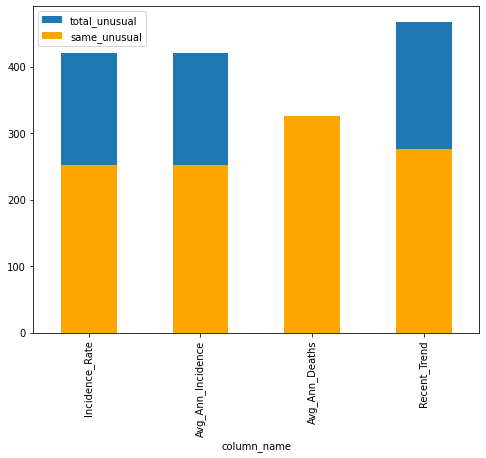

In [19]:
# Visualization of the results calculated from the section above
composition = pd.DataFrame({
    'column_name': ['Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 'Recent_Trend'],
    'total_unusual': [incidence_rate_total, avg_ann_incidence_total, avg_ann_deaths_total, recent_trend_total],
    'same_unusual': [incidence_rate_same, avg_ann_incidence_same, avg_ann_deaths_same, recent_trend_same]
})

composition.plot(x = 'column_name', y = 'same_unusual', 
                 ax = composition.plot(x = 'column_name', y = 'total_unusual', kind = 'bar'), 
                 kind = 'bar', color = 'orange', figsize=(8,6));

Based on the bar chart, it is clear that these columns share the same unusual values "*" and the unusual values "*" takes up a great portion of unusual values for each column.

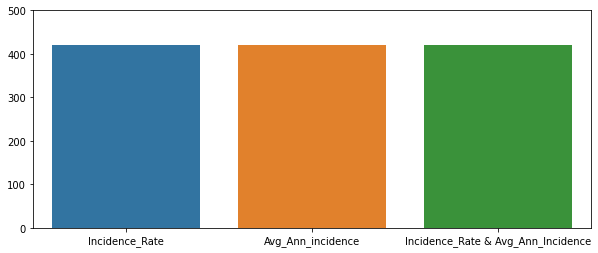

In [20]:
incidence_case_column = ['Incidence_Rate', 'Avg_Ann_incidence', 'Incidence_Rate & Avg_Ann_Incidence']
incidence_case_value = [incidence_rate_total, avg_ann_incidence_total, incidence_rateVSavg_ann_incidence]
plt.figure(figsize = (10, 4))
sns.barplot(x = incidence_case_column, y = incidence_case_value)
plt.ylim(0, 500)
plt.show();

The bar chart above indicates that column incidence_Rate and avg_ann_incidence contains the same total number of  unusual values. Cleaning one of them should help clean the other.

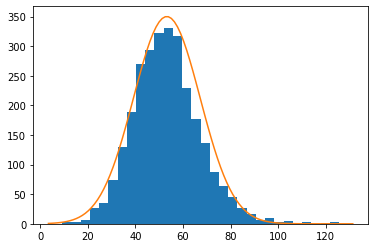

In [21]:
# Mortality_Rate exploration without '*'
mortality_without = cleandf[cleandf['Mortality_Rate'] != '*']['Mortality_Rate'].to_numpy(dtype = 'float64')

# Create a Gaussian distribution function
def Gaussian(x,mu,sigma,A):
    return A*np.exp(-0.5 * ((x-mu)/sigma)**2)

# Draw the historm gram and fitted Gaussian distribution line
plt.hist(mortality_without, bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = 1/mortality_without.shape[0] * np.sum(mortality_without,axis=0)
sigma = (1/mortality_without.shape[0] * np.sum((mortality_without - mu)**2,axis=0))**0.5
y = Gaussian(x, mu, sigma, 350)
plt.plot(x, y)
plt.show()

Based on the Gaussian distribution above, after removing the "*" in column Mortality_Rate, the dataset still looks normal distributed (including both high and low values) and not evidently skewed or distored - indicating removing the "*" will have minimal or no impact on the model.   

#### Incidence_Rate Exploration

In [22]:
cleandf['Incidence_Rate'].value_counts()

*         211
_         192
65.2       19
__         17
66.3       12
         ... 
69.7 #      1
71.4 #      1
60.7 #      1
45.3 #      1
23.7        1
Name: Incidence_Rate, Length: 813, dtype: int64

In [23]:
# Incidence_Rate exploration without '*' in Moratlity_Rate
# Besides * in Incidence_Rate, there also exists other format like '_', '__', 'number #'
# Hence, create a process_incidence function to deal with the problem

def process_incidence(row):
    number_list = ['0','1','2','3','4','5','6','7','8','9','.']
    temp = ''
    for i in range(len(row.Incidence_Rate)):
        if row.Incidence_Rate[i] in number_list:
            temp += row.Incidence_Rate[i]
    row.Incidence_Rate = temp
    return row


# Create a test dataframe by dropping observations containing '*' in Mortality_Rate
testdf = cleandf.drop(cleandf[cleandf['Mortality_Rate'] == '*'].index)


# Apply process_incidence function to deal with other unusual values
testdf = testdf.apply(process_incidence, axis = 'columns')

# Drop empty Incidence_Rate for '_', '__'
testdf.drop(testdf[testdf['Incidence_Rate'] == ''].index, inplace = True)

# Check the current Incidence_Rate value
testdf['Incidence_Rate'].value_counts()

65.2     19
71.5     12
66.3     12
80.4     11
70.4     11
         ..
123.7     1
98.9      1
102.6     1
124.8     1
23.7      1
Name: Incidence_Rate, Length: 724, dtype: int64

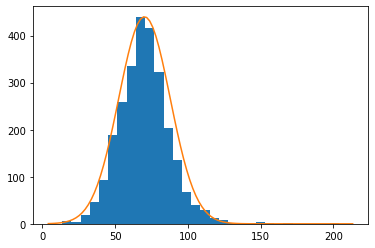

In [24]:
# Draw the historm gram and fitted Gaussian distribution line
Incidence_Rate_without = testdf['Incidence_Rate'].to_numpy(dtype = 'float64')
plt.hist(Incidence_Rate_without, bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = 1/Incidence_Rate_without.shape[0] * np.sum(Incidence_Rate_without,axis=0)
sigma = (1/Incidence_Rate_without.shape[0] * np.sum((Incidence_Rate_without - mu)**2,axis=0))**0.5
y = Gaussian(x, mu, sigma, 440)
plt.plot(x, y)
plt.show()

#### Avg_Ann_Incidence Exploration

In [25]:
cleandf['Avg_Ann_Incidence'].value_counts()

3 or fewer    211
_             192
6              88
9              79
7              73
             ... 
206             1
759             1
240             1
247             1
658             1
Name: Avg_Ann_Incidence, Length: 362, dtype: int64

True


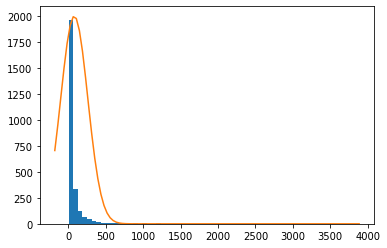

In [26]:
# Check that the test dataframe now only contains numerical value (integer)
print(testdf['Avg_Ann_Incidence'].str.isnumeric().sum() == testdf.shape[0])

# Draw the historm gram and fitted Gaussian distribution line
Avg_Ann_Incidence_without = testdf['Avg_Ann_Incidence'].to_numpy(dtype = 'float64')
plt.hist(Avg_Ann_Incidence_without, bins=60)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = 1/Avg_Ann_Incidence_without.shape[0] * np.sum(Avg_Ann_Incidence_without,axis=0)
sigma = (1/Avg_Ann_Incidence_without.shape[0] * np.sum((Avg_Ann_Incidence_without - mu)**2,axis=0))**0.5
y = Gaussian(x, mu, sigma, 2000)
plt.plot(x, y)
plt.show()

#### Avg_Ann_Deaths Exploration

True


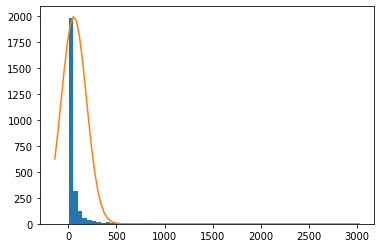

In [27]:
# Besides * in Incidence_Rate, there also exists other format like '1,234'
# Hence, create a process_deaths function to deal with the problem

def process_deaths(row):
    row.Avg_Ann_Deaths = row.Avg_Ann_Deaths.replace(',', '')
    return row

# Apply the function to deal with unusual cases
testdf = testdf.apply(process_deaths, axis = 'columns')

# Check that Avg_Ann_Deaths column only contains numerical value
print(testdf['Avg_Ann_Deaths'].str.isnumeric().sum() == testdf.shape[0])

# Draw the historm gram and fitted Gaussian distribution line
Avg_Ann_Deaths_without = testdf['Avg_Ann_Deaths'].to_numpy(dtype = 'float64')
plt.hist(Avg_Ann_Deaths_without, bins=60)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = 1/Avg_Ann_Deaths_without.shape[0] * np.sum(Avg_Ann_Deaths_without,axis=0)
sigma = (1/Avg_Ann_Deaths_without.shape[0] * np.sum((Avg_Ann_Deaths_without - mu)**2,axis=0))**0.5
y = Gaussian(x, mu, sigma, 2000)
plt.plot(x, y)
plt.show()

#### Recent_Trend Exploration

In [28]:
# Check the test dataframe without '*' in Morality_Rate
testdf['Recent_Trend'].value_counts()

stable     2382
falling     197
rising       39
*            23
Name: Recent_Trend, dtype: int64

Based on the above analysis and plot, we decide to directly drop the rows containing * in `Mortality_Rate` column. Here are several reasons:

1. When `Mortality_Rate` is * , it's more than 50% possible to have `Incidence_Rate`, `Avg_Ann_Incidence`, `Recent Trend` and `Avg_Ann_Deaths` to be unusual values. The ratio even reaches 100% for `Avg_Ann_Deaths`. If we keep * and convert them to 0, we actually introduce the bias. Besides, `Incidence_Rate`, `Avg_Ann_Incidence`, `Recent_Trend` and `Avg_Ann_Deaths` as features, they will create bias when make predictions.
2. If we drop rows containing * in these columns, there is extra benefit for column `Incidence_Rate` and `Avg_Ann_Incidence`. Because they have the same unusual value at the same time.
3. Aftering dropping unusual cells, the remaining data all shows a gaussian distribution especially `Mortality_Rate` and `Incidence_Rate`.
3. If we drop all unusual cases, we could make sure that all rest are reliable data (if there is no personal mistake in data collection part).
4. The model we are going to build is regression. Hence, it will predict a small value without actually having zero in the training dataset.

In [29]:
# Drop rows containing * in Mortality_Rate
reformatdf = cleandf.drop(cleandf[cleandf['Mortality_Rate'] == '*'].index)
reformatdf['Mortality_Rate'] = reformatdf['Mortality_Rate'].astype('float64')
reformatdf['Mortality_Rate'].value_counts()

48.3    19
51.8    17
56.3    15
54.4    14
52.8    14
        ..
81.3     1
31.5     1
32.1     1
75.8     1
83.6     1
Name: Mortality_Rate, Length: 617, dtype: int64

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

#### According to the analysis in 1.5, we droped the rows containing unusual symbols and convert rest into numerical values.
#### Incidence_Rate Reformat

In [30]:
# Apply process_incidence function to deal with other unusual values in column Incident_Rate
reformatdf = reformatdf.apply(process_incidence, axis = 'columns')

# Drop empty Incidence_Rate for '_', '__'
reformatdf.drop(reformatdf[reformatdf['Incidence_Rate'] == ''].index, inplace = True)

# Check the current Incidence_Rate value
reformatdf['Incidence_Rate'] = reformatdf['Incidence_Rate'].astype('float64')
reformatdf['Incidence_Rate'].value_counts()

65.2     19
71.5     12
66.3     12
80.4     11
70.4     11
         ..
123.7     1
98.9      1
102.6     1
124.8     1
23.7      1
Name: Incidence_Rate, Length: 724, dtype: int64

#### Avg_Ann_Incidence Reformat

In [31]:
# After cleaning the column Incidence_Rate, the column Avg_Ann_incidence looks good now
reformatdf['Avg_Ann_Incidence'] = reformatdf['Avg_Ann_Incidence'].astype('float64')
reformatdf['Avg_Ann_Incidence'].value_counts()

6.0       85
9.0       79
7.0       72
11.0      69
15.0      64
          ..
448.0      1
616.0      1
1326.0     1
364.0      1
658.0      1
Name: Avg_Ann_Incidence, Length: 359, dtype: int64

#### Avg_Ann_Deaths Reformat

In [32]:
# Apply the function to deal with unusual cases in column Avg_Ann_Deaths
reformatdf = reformatdf.apply(process_deaths, axis = 'columns')
reformatdf['Avg_Ann_Deaths'] = reformatdf['Avg_Ann_Deaths'].astype('float64')
reformatdf['Avg_Ann_Deaths'].value_counts()

5.0      104
4.0      101
9.0       93
8.0       84
7.0       78
        ... 
262.0      1
185.0      1
146.0      1
326.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 300, dtype: int64

In [33]:
# Check the shape of the dataset after cleaning the above columns
reformatdf.shape

(2641, 20)

#### Recent_Trend Reformat

In [34]:
# Drop * in the Recent_Trend column
reformatdf.drop(reformatdf[reformatdf['Recent_Trend'] == '*'].index, inplace = True)

# Save a df to do chi-test to decide whether to include the recent_trend
chitestdf = reformatdf

# Create dummy variable for this categorical column
# Here, set drop_first = True to drop first dummy varible column to avoid multicollinearity
reformatdf = pd.get_dummies(reformatdf, columns=['Recent_Trend'], drop_first = True)

In [35]:
# Check the shape of the dataset after cleaning all relevant columns
reformatdf.shape

(2618, 21)

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [36]:
reformatdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 2 to 3133
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                2618 non-null   object 
 1   AreaName             2618 non-null   object 
 2   All_Poverty          2618 non-null   int64  
 3   M_Poverty            2618 non-null   int64  
 4   F_Poverty            2618 non-null   int64  
 5   FIPS                 2618 non-null   object 
 6   Med_Income           2618 non-null   float64
 7   Med_Income_White     2618 non-null   float64
 8   M_With               2618 non-null   int64  
 9   M_Without            2618 non-null   int64  
 10  F_With               2618 non-null   int64  
 11  F_Without            2618 non-null   int64  
 12  All_With             2618 non-null   int64  
 13  All_Without          2618 non-null   int64  
 14  Incidence_Rate       2618 non-null   float64
 15  Avg_Ann_Incidence    2618 non-null   f

In [37]:
# Don't process non-numerical column
# Don't procee Med_Income and Med_Income_White (the values are not impacted by population and within reasonable range and no need to process)

# Process all except Avg_Ann_Incidence, Avg_Ann_Deaths 
for i in range(2, 5):
    reformatdf.iloc[:, i] = reformatdf.iloc[:, i] / reformatdf.iloc[:, 18] * 100000

for i in range(8, 14):
    reformatdf.iloc[:, i] = reformatdf.iloc[:, i] / reformatdf.iloc[:, 18] * 100000


# Process Avg_Ann_Incidence, Avg_Ann_Deaths
reformatdf.iloc[:, 15] = reformatdf.iloc[:, 15] / reformatdf.iloc[:, 18] * 100000
reformatdf.iloc[:, 17] = reformatdf.iloc[:, 17] / reformatdf.iloc[:, 18] * 100000

In [38]:
reformatdf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,Recent_Trend_rising,Recent_Trend_stable
2,AK,"Anchorage Municipality, Alaska",8006.160130,3581.579872,4424.580257,02020,78326.0,87235.0,40424.848089,7782.185842,...,7162.155376,81411.808032,14944.341218,61.5,43.857447,47.3,32.139808,298695,0,1
3,AK,"Bethel Census Area, Alaska",24317.396634,12253.426948,12063.969687,02050,51012.0,92647.0,35640.254096,15089.713585,...,9885.211189,72567.703109,24974.924774,62.7,33.433634,58.3,27.861362,17946,0,1
7,AK,"Fairbanks North Star Borough, Alaska",7780.710823,3536.048017,4244.662806,02090,71068.0,74242.0,40755.387379,6982.766408,...,5341.710913,81114.311811,12324.477321,58.1,36.133332,54.0,31.114814,99631,0,1
9,AK,"Juneau City and Borough, Alaska",6441.567957,3495.542801,2946.025156,02110,85746.0,90553.0,41943.460740,7427.646843,...,6756.014165,83407.619978,14183.661009,35.1,27.475882,34.4,24.423006,32756,0,1
10,AK,"Kenai Peninsula Borough, Alaska",9573.020548,4471.313664,5101.706884,02122,63684.0,64663.0,38565.941542,11083.552938,...,9357.722317,75886.598116,20441.275254,64.9,67.173048,50.1,48.226804,58059,0,1


## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


In [39]:
# Dropped the variables 'State', 'AreaName' and 'FIPS' are used as index (primary key)
# Dropped the variable 'Recent_Trend_' for this part as it is dummy variable and will be examed seperately in the following section
# Dropped the variable 'POPESTIMATE2015' as it is already integrated into the variables with adjusted raw data.

drop_columns = ['State', 'AreaName', 'FIPS', 'POPESTIMATE2015', 'Recent_Trend_rising', 'Recent_Trend_stable']
tempdf = reformatdf.drop(columns = drop_columns)
tempdf.head()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
2,8006.160130,3581.579872,4424.580257,78326.0,87235.0,40424.848089,7782.185842,40986.959942,7162.155376,81411.808032,14944.341218,61.5,43.857447,47.3,32.139808
3,24317.396634,12253.426948,12063.969687,51012.0,92647.0,35640.254096,15089.713585,36927.449014,9885.211189,72567.703109,24974.924774,62.7,33.433634,58.3,27.861362
7,7780.710823,3536.048017,4244.662806,71068.0,74242.0,40755.387379,6982.766408,40358.924431,5341.710913,81114.311811,12324.477321,58.1,36.133332,54.0,31.114814
9,6441.567957,3495.542801,2946.025156,85746.0,90553.0,41943.460740,7427.646843,41464.159238,6756.014165,83407.619978,14183.661009,35.1,27.475882,34.4,24.423006
10,9573.020548,4471.313664,5101.706884,63684.0,64663.0,38565.941542,11083.552938,37320.656573,9357.722317,75886.598116,20441.275254,64.9,67.173048,50.1,48.226804


In [40]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 2 to 3133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2618 non-null   float64
 1   M_Poverty          2618 non-null   float64
 2   F_Poverty          2618 non-null   float64
 3   Med_Income         2618 non-null   float64
 4   Med_Income_White   2618 non-null   float64
 5   M_With             2618 non-null   float64
 6   M_Without          2618 non-null   float64
 7   F_With             2618 non-null   float64
 8   F_Without          2618 non-null   float64
 9   All_With           2618 non-null   float64
 10  All_Without        2618 non-null   float64
 11  Incidence_Rate     2618 non-null   float64
 12  Avg_Ann_Incidence  2618 non-null   float64
 13  Mortality_Rate     2618 non-null   float64
 14  Avg_Ann_Deaths     2618 non-null   float64
dtypes: float64(15)
memory usage: 327.2 KB


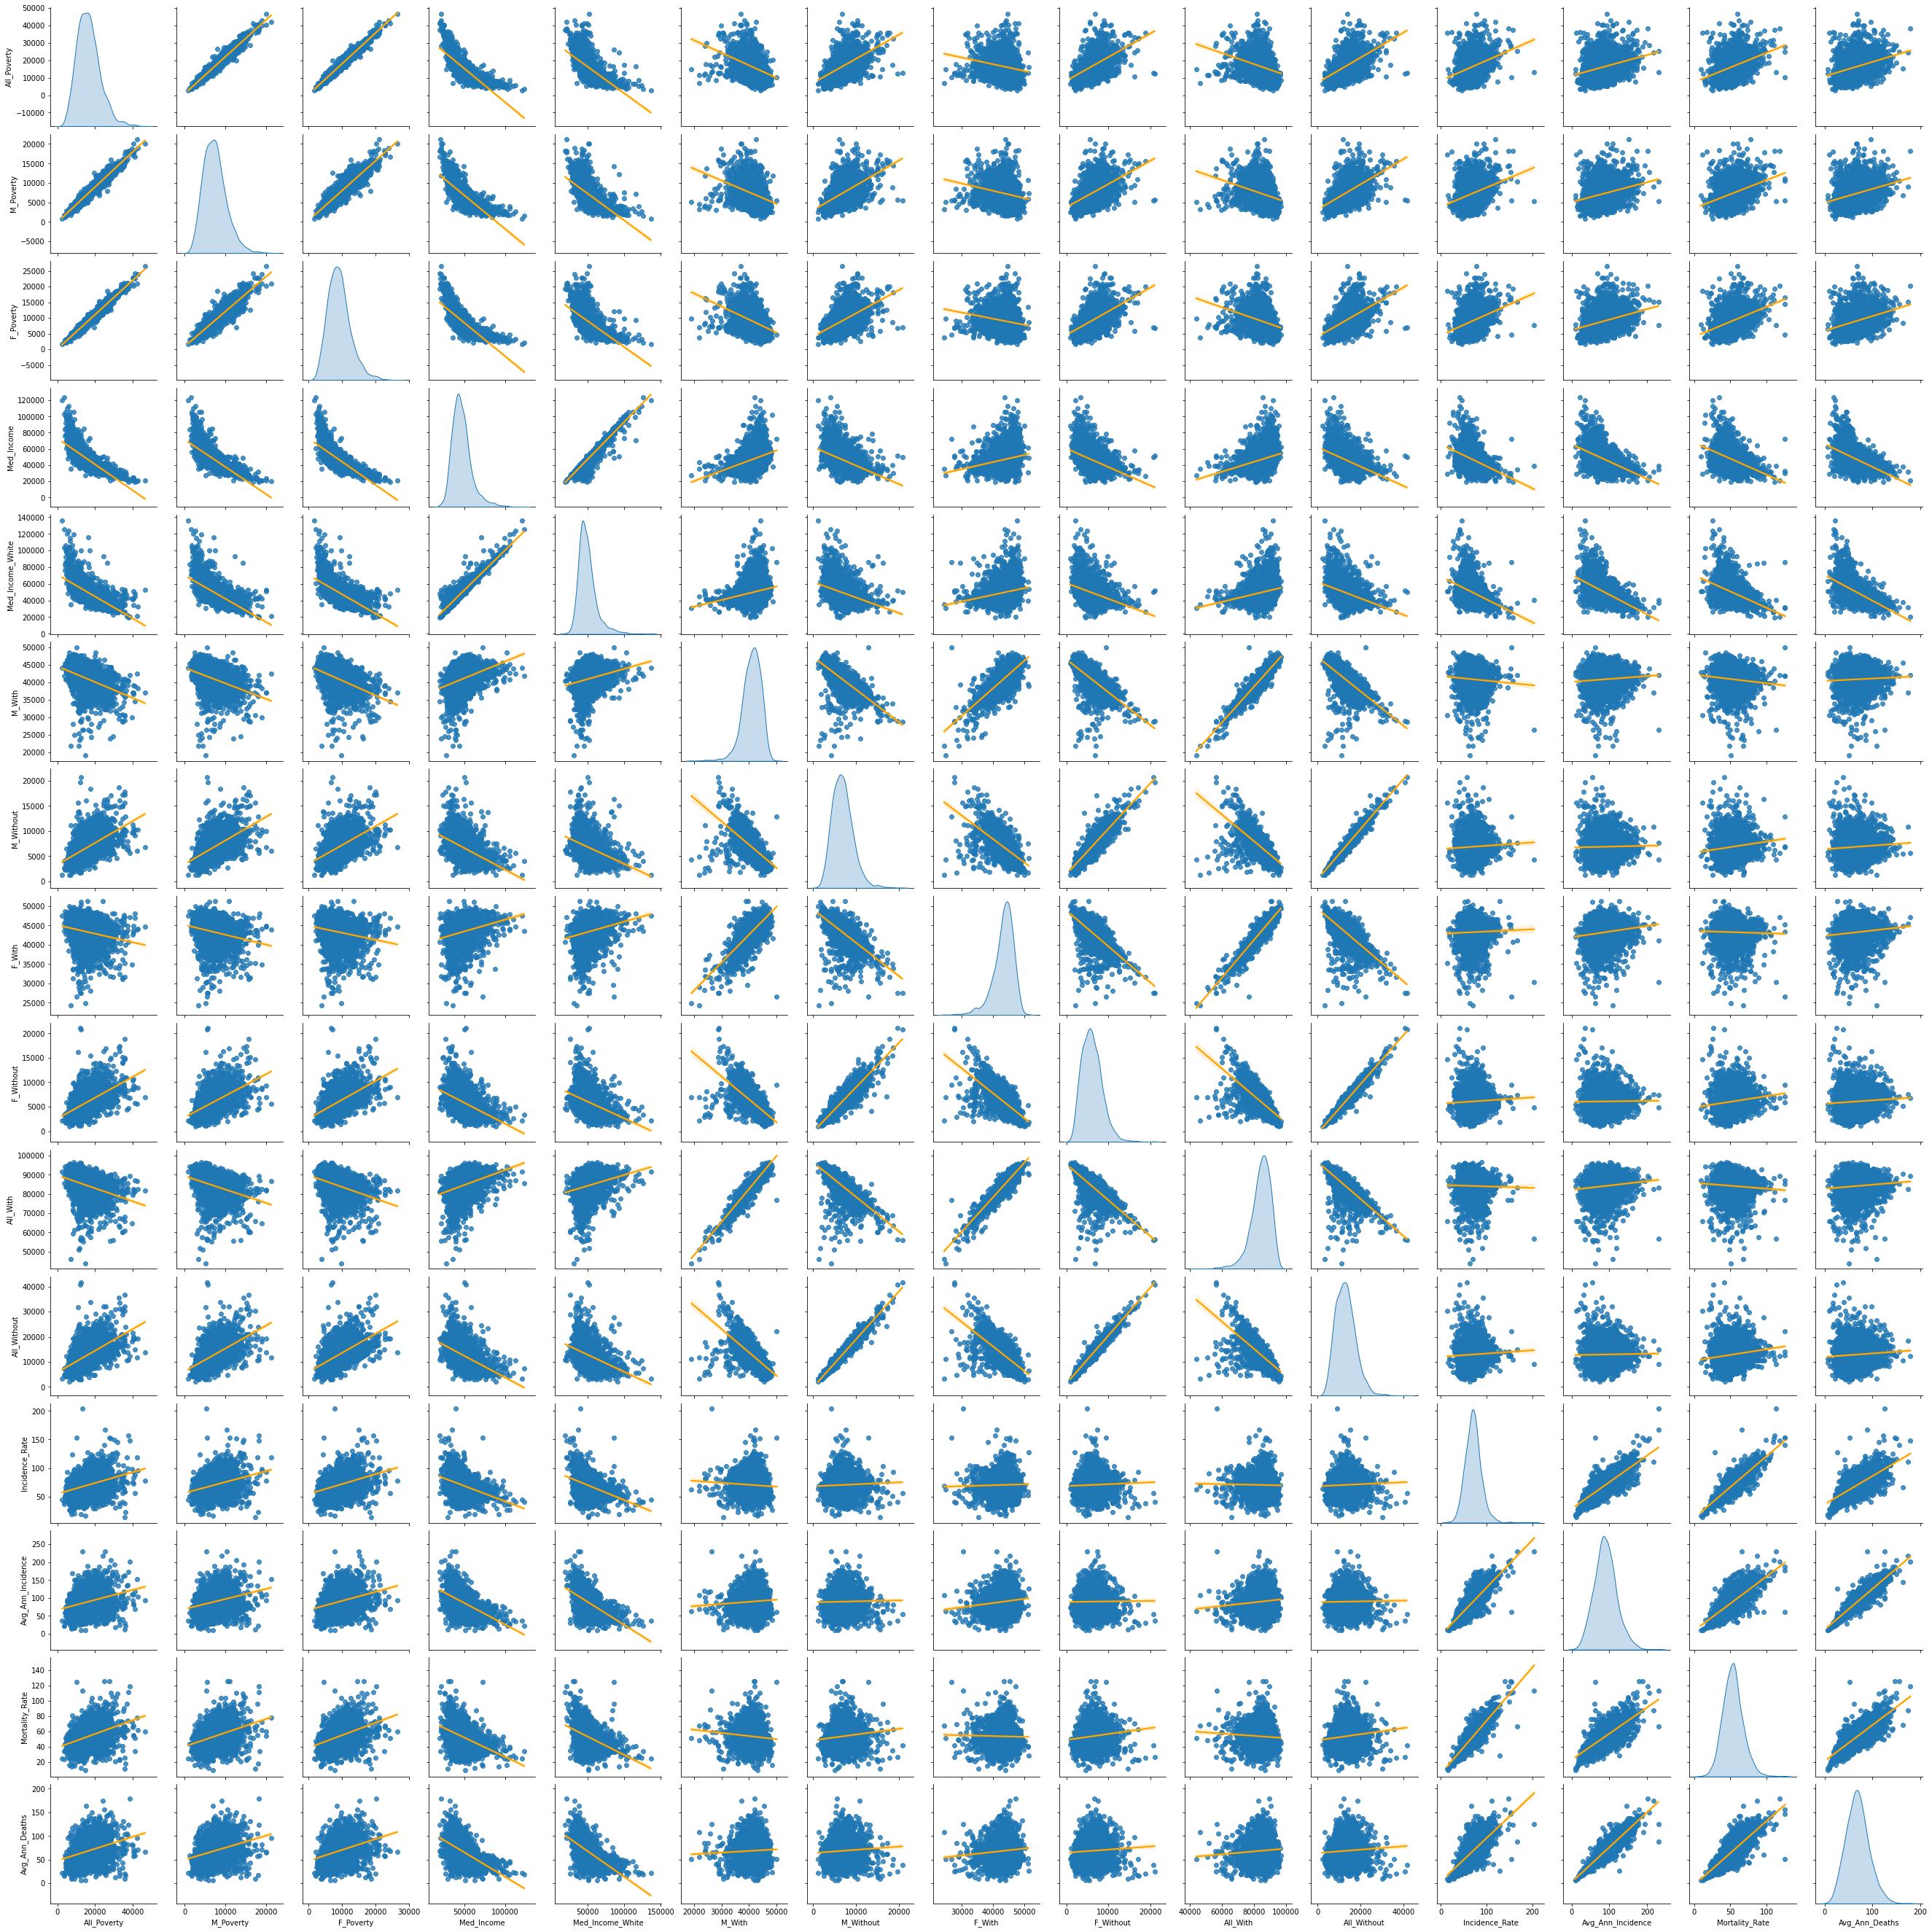

In [41]:
sns.pairplot(tempdf, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'orange'}})
plt.show()

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

In [42]:
# Show the correlation between features
tempdf.corr()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
All_Poverty,1.000000,0.977545,0.984624,-0.785962,-0.632386,-0.403726,0.548692,-0.206551,0.536689,-0.327770,0.555527,0.331057,0.286495,0.388135,0.321742
M_Poverty,0.977545,1.000000,0.925703,-0.760946,-0.622021,-0.366120,0.549411,-0.219638,0.513020,-0.314151,0.543764,0.308426,0.268739,0.361757,0.300952
F_Poverty,0.984624,0.925703,1.000000,-0.779985,-0.619483,-0.421178,0.529445,-0.188681,0.538068,-0.327918,0.546396,0.338565,0.291476,0.396809,0.328040
Med_Income,-0.785962,-0.760946,-0.779985,1.000000,0.938941,0.346017,-0.443056,0.229982,-0.441120,0.308622,-0.452550,-0.383623,-0.505620,-0.446231,-0.538672
Med_Income_White,-0.632386,-0.622021,-0.619483,0.938941,1.000000,0.218972,-0.355212,0.207827,-0.358619,0.227892,-0.365365,-0.379972,-0.550891,-0.434299,-0.577255
M_With,-0.403726,-0.366120,-0.421178,0.346017,0.218972,1.000000,-0.658666,0.755413,-0.662753,0.939408,-0.676350,-0.067526,0.069759,-0.100928,0.048141
M_Without,0.548692,0.549411,0.529445,-0.443056,-0.355212,-0.658666,1.000000,-0.636234,0.908584,-0.691303,0.976818,0.047643,0.021338,0.128484,0.069731
F_With,-0.206551,-0.219638,-0.188681,0.229982,0.207827,0.755413,-0.636234,1.000000,-0.686913,0.934261,-0.677266,0.030215,0.130619,-0.024572,0.101186
F_Without,0.536689,0.513020,0.538068,-0.441120,-0.358619,-0.662753,0.908584,-0.686913,1.000000,-0.720040,0.976940,0.045596,0.012230,0.133488,0.067650
All_With,-0.327770,-0.314151,-0.327918,0.308622,0.227892,0.939408,-0.691303,0.934261,-0.720040,1.000000,-0.722393,-0.020941,0.106298,-0.067780,0.079135


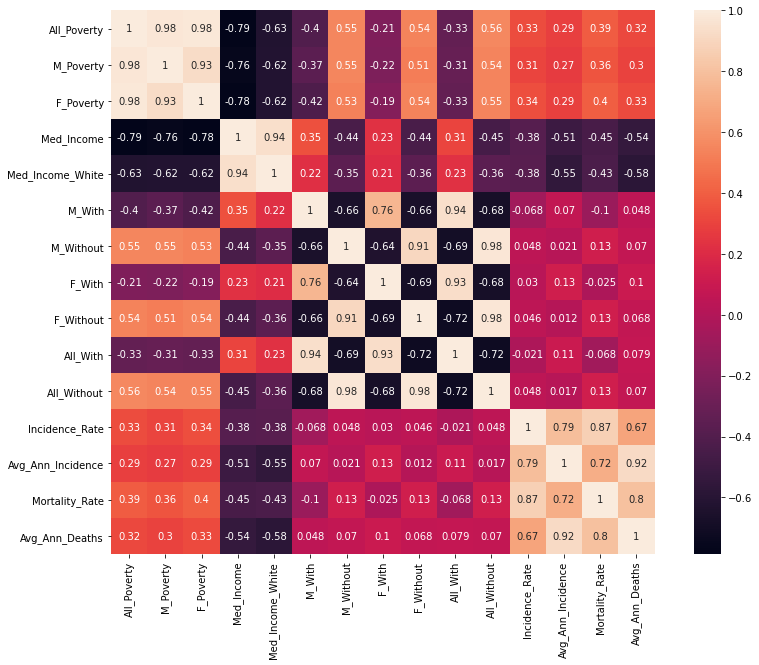

In [43]:
# Visualize the correlation between features in a heatmap
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(round(tempdf.corr(),3), annot = True, vmax = 1, square = True)
plt.show()

In [44]:
from sklearn.feature_selection import f_classif

# Conduct a ANOVA F test to choose numerical variable
process_number = tempdf.copy()
process_number_y = tempdf['Mortality_Rate']
process_number.drop('Mortality_Rate', axis = 1, inplace = True)
F_statistic, p_values = f_classif(process_number, process_number_y)
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': process_number.columns.values,
                                    'F-Score': F_statistic,
                                    'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,Incidence_Rate,16.383754,0.000000
1,Avg_Ann_Deaths,8.850789,0.000000
2,Avg_Ann_Incidence,5.950484,0.000000
3,Med_Income_White,2.575955,0.000000
4,Med_Income,2.490320,0.000000
5,F_Poverty,2.047045,0.000000
6,All_Poverty,2.035822,0.000000
7,M_Poverty,1.949006,0.000000
8,F_Without,1.252139,0.000220
9,All_Without,1.246252,0.000290


According to the `F-test` and correlation plot, we choose `Incidence_Rate`, `Avg_Ann_Deaths`, `Med_Income`, `All_Poverty`, and `All_Without` as features. Reasons are as followed:

1. The p-value of these five variables for `F-test` is smaller than 0.05.
2. `Avg_Ann_Incidence` is dropped due to its high correlation `Incidence_Rate` and `Avg_Ann_Deaths`.
3. For the category of income, poverty and without & with insurance, there are high correlation between features within each group. Hence, we only select one of them from each group. As there is no clear indication of gender influences, we choose the total amount: `Med_Income`, `All_Poverty` and `All_Without` as the input factors.

In [45]:
import scipy

# Conduct a chi-test to decide whether to add the categorical variable for 'Recent_Trend'
chi, p , dof, ex = scipy.stats.chi2_contingency(pd.crosstab(chitestdf['Mortality_Rate'], chitestdf['Recent_Trend']))
print(p)

0.6648229159690351


After conducting the chi-test, the p value is greater than 0.05, suggesting the variable 'Recent_Trend' is not significant. Hence, we also don't include the dummy variable of `Recent_Trend` in our features.

In [46]:
# Format the final dataframe before loading to models
finaldf = reformatdf[['Incidence_Rate', 'Avg_Ann_Deaths', 'Med_Income', 'All_Poverty', 'All_Without', 'Mortality_Rate']]
finaldf.reset_index(drop = True, inplace = True)
finaldf.head()

,Incidence_Rate,Avg_Ann_Deaths,Med_Income,All_Poverty,All_Without,Mortality_Rate
0,61.5,32.139808,78326.0,8006.160130,14944.341218,47.3
1,62.7,27.861362,51012.0,24317.396634,24974.924774,58.3
2,58.1,31.114814,71068.0,7780.710823,12324.477321,54.0
3,35.1,24.423006,85746.0,6441.567957,14183.661009,34.4
4,64.9,48.226804,63684.0,9573.020548,20441.275254,50.1


## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = finaldf.drop(columns = ['Mortality_Rate'])
y = finaldf['Mortality_Rate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1832, 5) (1832,)
(393, 5) (393,)
(393, 5) (393,)


We split the dataset to training (70%), validation (15%) and test (15%) as this is a common method to split the dataset.

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

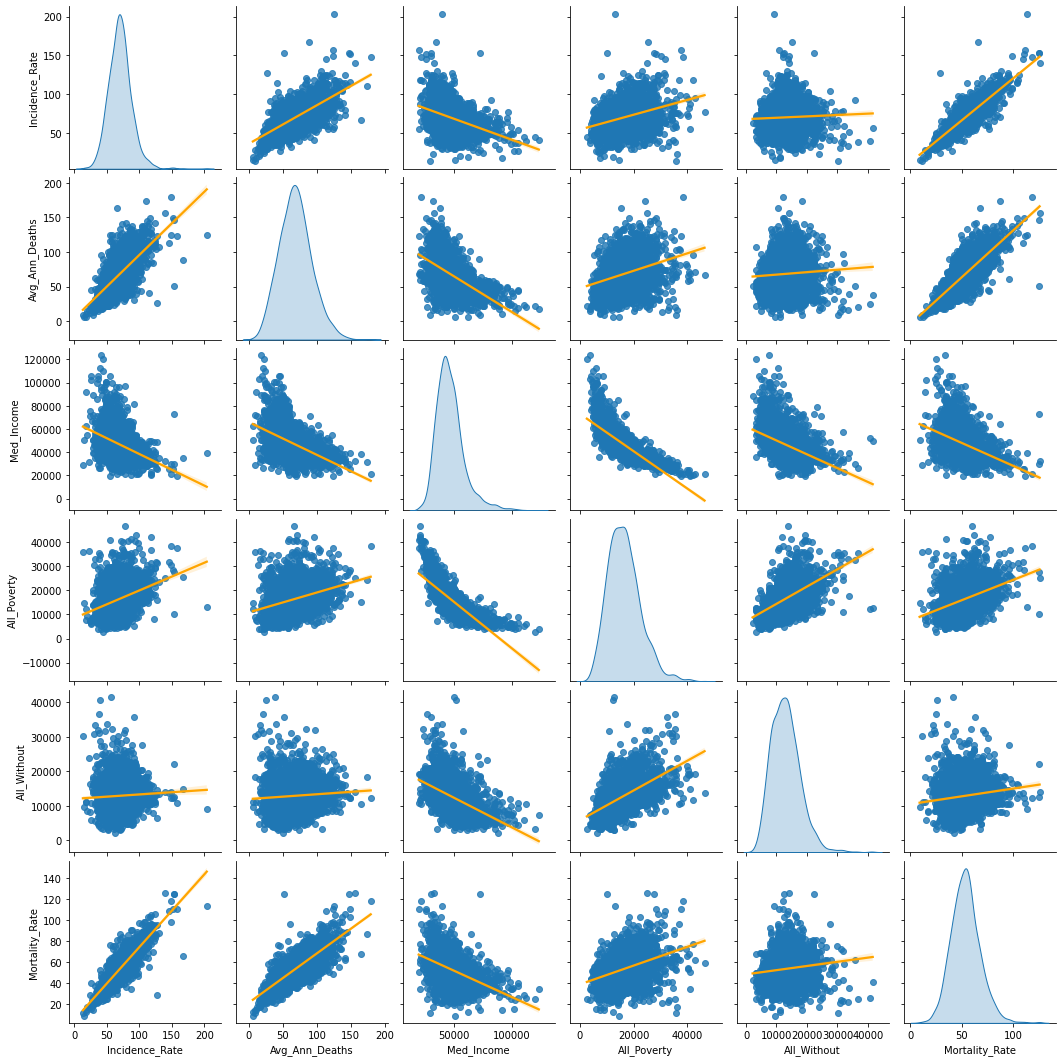

In [48]:
sns.pairplot(finaldf, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'orange'}})
plt.show()

#### Model 1: Linear regression with partial features

Based on the pairplot above, we noticed that variable 'Incidence_Rate' and 'Avg_Ann_Deaths' have a clear linear relationship with the reponse variable Mortality_Rate respectively. Therefore, we added these two variables only to our first linear regression model.

In [49]:
model1 = smf.ols('y_train~ Incidence_Rate +Avg_Ann_Deaths', data=X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     4939.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:27:05   Log-Likelihood:                -5770.6
No. Observations:                1832   AIC:                         1.155e+04
Df Residuals:                    1829   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9881      0.537      7.426      0.000       2.935       5.041
Incidence_Rate     0.4746      0.010     46.629      0.000       0.455       0.495
Avg_Ann_Deaths     0.2368      0.007     31.679      0.000       0.222       0.251
==============================================================================
Omnibus:                      188.974   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1477.001
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the output of model 1, the R2 is 0.844 and all independent variables are significant. 

#### Model 2: Linear regression with all features

As the performance of model 1 is not bad, we thought about to add more variables to increase the flexbility of the model. Therefore, we added all these five variables in our model 2. 

In [50]:
model2 = smf.ols('y_train~ Incidence_Rate + Avg_Ann_Deaths + Med_Income + All_Poverty + All_Without', data=X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2159.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:27:05   Log-Likelihood:                -5700.4
No. Observations:                1832   AIC:                         1.141e+04
Df Residuals:                    1826   BIC:                         1.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.9011      1.647     -7.226      0.000     -15.131      -8.671
Incidence_Rate     0.4574      0.010     45.357      0.000       0.438       0.477
Avg_Ann_Deaths     0.2634      0.008     32.003      0.000       0.247       0.280
Med_Income         0.0002   1.92e-05      8.734      0.000       0.000       0.000
All_Poverty        0.0003   3.78e-05      8.187      0.000       0.000       0.000
All_Without        0.0002   3.43e-05      5.390      0.000       0.000       0.000
==============================================================================
Omnibus:                      187.000   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1304.614
Skew:                          -0.168   Prob(JB):                    5.09e-284
Kurtosis:                       7.120   Cond. No.                     6.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the output of model 2, the R2 is 0.855 and all independent variables are significant. The R2 has increased a little. 

#### Model 3: Linear regression with transformed parameters

As shown in the pairplot above, variable 'Med_Income','All_Poverty', and 'All_Without' do not have a strong linear relationship with the reponse variable Mortality_Rate respectively. Therefore, we thought about conduting non-linear (logarithm) transformation on these variables in our model 3.

In [51]:
model3 = smf.ols('y_train~ Incidence_Rate +Avg_Ann_Deaths + np.log(Med_Income) + np.log(All_Poverty) + np.log(All_Without)', data=X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2187.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:27:05   Log-Likelihood:                -5690.1
No. Observations:                1832   AIC:                         1.139e+04
Df Residuals:                    1826   BIC:                         1.143e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -206.9002     18.976    -10.903      0.000    -244.117    -169.684
Incidence_Rate          0.4562      0.010     45.612      0.000       0.437       0.476
Avg_Ann_Deaths          0.2678      0.008     32.198      0.000       0.251       0.284
np.log(Med_Income)     11.5498      1.184      9.751      0.000       9.227      13.873
np.log(All_Poverty)     6.6846      0.749      8.926      0.000       5.216       8.153
np.log(All_Without)     2.3284      0.440      5.296      0.000       1.466       3.191
==============================================================================
Omnibus:                      178.951   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1272.321
Skew:                          -0.082   Prob(JB):                    5.24e-277
Kurtosis:                       7.079   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the output of model 3, the R2 is 0.857 and all independent variables are significant. The R2 has increased a little compared to model 2. 

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

In [52]:
y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)
y_pred3 = model3.predict(X_val)

rmse1 = round(np.sqrt(mean_squared_error(y_val, y_pred1)), 4)
rmse2 = round(np.sqrt(mean_squared_error(y_val, y_pred2)), 4)
rmse3 = round(np.sqrt(mean_squared_error(y_val, y_pred3)), 4)

r2_1 = round(r2_score(y_val, y_pred1), 4)
r2_2 = round(r2_score(y_val, y_pred2), 4)
r2_3 = round(r2_score(y_val, y_pred3), 4)

print(rmse1,rmse2,rmse3)
print(r2_1,r2_2,r2_3)

5.8212 5.5079 5.546
0.8296 0.8475 0.8454


Based on the R2 on the validation dataset, model 2 is the best model as it has the highest score 0.8475.
Based on the RMSE on the validation dataset, model 2 is also the best model as it has the lowest score 5.5079.
Overall, model 2 is our best performing model.

## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [53]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.tools import add_constant
# Add constant to get the correct results of VIF for each feature
# Citation: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [54]:
# For model1, partial features
X_new = X[['Incidence_Rate', 'Avg_Ann_Deaths']]
X_new = add_constant(X_new)
pd.Series([variance_inflation_factor(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns)

const             16.911119
Incidence_Rate     1.828335
Avg_Ann_Deaths     1.828335
dtype: float64

In [55]:
# For model2, all features
X_new = add_constant(X)
pd.Series([variance_inflation_factor(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns)

const             167.217301
Incidence_Rate      1.937590
Avg_Ann_Deaths      2.405361
Med_Income          3.543366
All_Poverty         3.235750
All_Without         1.508020
dtype: float64

In [56]:
# For model3, applying log to the dataset
X_new = X
X_new['All_Poverty'] = np.log(X_new['All_Poverty'])
X_new['All_Without'] = np.log(X_new['All_Without'])
X_new['Med_Income'] = np.log(X_new['Med_Income'])
X_newnew = add_constant(X_new)
pd.Series([variance_inflation_factor(X_newnew.values, i) 
               for i in range(X_newnew.shape[1])], 
              index=X_newnew.columns)

const             22127.781680
Incidence_Rate        1.936797
Avg_Ann_Deaths        2.485719
Med_Income            5.415685
All_Poverty           5.097228
All_Without           1.631337
dtype: float64

It seems that the VIF is all below than 10 and there is no problematic features. Therefore, there is no adjustments is required for our model.

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [57]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

mse1 = round(mean_squared_error(y_test, y_pred1), 4)
mse2 = round(mean_squared_error(y_test, y_pred2), 4)
mse3 = round(mean_squared_error(y_test, y_pred3), 4)

print(mse1, mse2, mse3)

32.2903 29.4939 30.3162


Model 2 has the lowest MSE on the test data set. The MSE for the final regression model (Model 2) using the test set is 29.49.

## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

Since our current best model (Model 2) is a very simple linear regression model, we thought to use more advanced model to add a bit of flexbility while minimizing the variances the new model brought in. We considered several candidate supervised learning models, including Nueral Network, Random Forest, Naive Bayes, and XGBoost. Some of these models produce very poor performance compared to Model 2. Only XGBoost model produces the closet MSE in our preliminary screening. 

Then, we focused on tuning the hyperparameters on the XGBoost to improve the model performance. Firstly, we used cross validation model to identify the best parameters (n_estimators=110, max_depth=3, colsample_bytree=0.4) in XGBoost. Secondly, we tuned the learning rate, as it is a very critical but delicate parameter in the models. Therefore, we approached this by binary search to narrow the range of learning rate that produce competitive MSE. After trial and error, we were able to find a learning rate that outperform model 2. The learning rate is 0.9 in our XGBoost model. 

#### XGBoost

In [58]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

In [59]:
X_train_new = finaldf.drop(columns = ['Mortality_Rate'])
X_train_new.drop(X_test.index.to_list(), axis=0, inplace=True)
y_train_new = finaldf['Mortality_Rate']
y_train_new.drop(y_test.index.to_list(), axis=0, inplace=True)
print(X_train_new.shape)
print(y_train_new.shape)

(2225, 5)
(2225,)


In [60]:
error = 999
opt_ne = 0
opt_md = 0
opt_cb = 0

for ne in range(20, 151, 10):
    for md in range(2, 10):
        for cb in np.linspace(0.1, 0.5, 5):
            model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = ne, 
                                 max_depth = md, learning_rate = 0.1, colsample_bytree = cb)
            
            k_fold = KFold(n_splits = 5) 
            all_error = cross_val_score(model, X_train_new, y_train_new, 
                                   cv = k_fold,  
                                   scoring = 'neg_mean_squared_error', n_jobs = -1)
            
            temp_error = np.mean(-all_error)
            if temp_error < error:
                error = temp_error
                opt_ne = ne
                opt_md = md
                opt_cb = cb

print(opt_ne, opt_md, opt_cb, error)

110 3 0.4 35.40872517138089


The output above provides us with the best hyperparameters for the XGBoost model, n_estimators=110, max_depth=3, colsample_bytree=0.4.

In [61]:
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 110, 
                                 max_depth = 3, learning_rate = 0.09, colsample_bytree = 0.4)
xgb_model.fit(X_train_new, y_train_new)

xgb_pred = xgb_model.predict(X_test)
xgb_mse = round(mean_squared_error(y_test, xgb_pred), 4)
print(xgb_mse)

29.3727


The other supervised learning model we chose is XGBoost model. The MSE on the same hold-out test set is 29.37, which is lower than 29.49 (model 2).